# Introduction to Spaces

This notebook builds on the introduction ([introduction.ipynb](introduction.ipynb)) which covered types and schemas, and showed how to build up to Spaces and Points, using dictionaries and type annotations

In [1]:
from typing import List, Tuple, Callable
import numpy as np
import matplotlib.pyplot as plt


Let's start by rebuilding our Space from our `complex_schema`.

#### Complex Schemas

Now that we've explored various types of data that can be included in our schemas, let's combine these elements to create more complex and comprehensive schemas. Complex schemas allow us to represent intricate data structures that can capture the full complexity of sophisticated dynamical systems.

Here's an example of a complex schema that incorporates the different types we've discussed: 


In [2]:
complex_schema = {
    'myList': List[float],  # A list where each element is expected to be a float,
    'my2x1array': np.ndarray[tuple[int, int], float],  # A numpy array with dimensions 2x1
    'myFunc': Callable[[List[float], np.ndarray[tuple[int, int], float]], bool]
}

print(complex_schema)

{'myList': typing.List[float], 'my2x1array': numpy.ndarray[tuple[int, int], float], 'myFunc': typing.Callable[[typing.List[float], numpy.ndarray[tuple[int, int], float]], bool]}


It's important to note that Python is not a strongly typed language, and dictionary-based schemas do not directly support type enforcement. While tools like `dataclasses` can provide better type checking in Python, we'll use our flexible schema approach to showcase its power and versatility.

Now that we have defined our complex schema a we can create a function to check records against it. 

In [3]:
# Define the function that matches the 'myFunc' type in the schema
def myFunc(myList: List[float], myArray: np.ndarray) -> bool:
    
    bit = True

    # Check if myList is a list
    if not isinstance(myList, list):
        print("myList is not a lis")
        bit = False
    
    # Check if the elements of myList are floats
    for element in myList:
        if not isinstance(element, float):
            print("myList does not contain only floats")
            bit = False
        
    # check if each element in myList is between 0 and 1
    if not all(0 <= element <= 1 for element in myList):
        print("myList contains elements that are not between 0 and 1")
        bit = False
    
    # check if myArray is a numpy array
    if not isinstance(myArray, np.ndarray):
        print("myArray is not a numpy array")
        bit = False
    
    # Check if myArray has the shape (2, 1)
    if myArray.shape != (2, 1):
        # edgge case where the shape is (2,) since its shorthand for (2, 1) in 1D arrays
        if myArray.shape == (2,):
            pass
        else:
            print("myArray does not have the shape (2, 1)")
            bit = False
    
    # check if the elements of myArray are Integers
    if not myArray.dtype == int:
        print("myArray does not contain only integers")
        bit = False

    # If both conditions are met, return True
    return bit

Let's create some sample records to demonstrate how this schema can be used. 

We'll create several sample records: some that adhere to the schema and others that don't. Then, we'll use our `myFunc` to validate these records against our schema. This approach allows us to maintain flexibility while still ensuring data integrity.

Let's start by creating these sample records and then use our `myFunc` to check if they conform to our schema:

In [4]:

# Example record that matches the schema requirements
record_1 = {
    'myList': [2.0, 4.1],                           # Example list of floats
    'my2x1array': np.array([1.1, 3]),             # Example 2x1 numpy array
    'myFunc' : myFunc                              # Example function
}

print("This is the record satisfying the schema:")
print(record_1)
print("")

# Demonstrate the function in action
result_1 = record_1['myFunc'](record_1['myList'], record_1['my2x1array'])
print("")
print("Function result:", result_1)  # Expected output: False


This is the record satisfying the schema:
{'myList': [2.0, 4.1], 'my2x1array': array([1.1, 3. ]), 'myFunc': <function myFunc at 0x113aa22a0>}

myList contains elements that are not between 0 and 1
myArray does not contain only integers

Function result: False


We used myFunc to introduce a method which could validate the schema. Putting type annotated callables in schemas can be very helpful for a range use cases, such as using functions to encode utilies, beliefs or strategies.  In this example, we used constraint satisfaction because this tutorial is about types and schemas.


In the previous example, we saw a record (`record_1`) that did not satisfy the schema requirements. The `myFunc` returned `False` because the `my2x1array` contained a float value (1.1) instead of an integer.

Now, let's look at another example where the record does satisfy the schema requirements. We'll create a new record (`record_2`) that adheres to the schema and test it with our validation function.

In [5]:
# Example record that matches the schema requirements
record_2 = {
    'myList': [0.1, 0.75],                           # Example list of floats
    'my2x1array': np.array([1, 3]),             # Example 2x1 numpy array
    'myFunc' : myFunc                              # Example function
}

# Demonstrate the function in action
result_2 = record_2['myFunc'](record_2['myList'], record_2['my2x1array'])
print("Trying again with a corrected record:")
print("Function result:", result_2)  # Expected output: True

Trying again with a corrected record:
Function result: True


`record_2` can be considered a **Point** in the **Space** characterized by `complex_schema`. With a little reorganization we could make `myFunc` a constraint that is expected to hold for all points rather than one of the values in a record.

In [6]:
mySpace = {'schema':
           {'myList': List[float],  # A list where each element is expected to be a float,
            'my2x1array': np.ndarray[tuple[int, int], float]
            },
    'constraint':myFunc
}

print(mySpace)

{'schema': {'myList': typing.List[float], 'my2x1array': numpy.ndarray[tuple[int, int], float]}, 'constraint': <function myFunc at 0x113aa22a0>}


In [7]:
myPoint = {'myList': [2.1, 4.2], 'my2x1array': np.array([1, 3])}
print(myPoint)

{'myList': [2.1, 4.2], 'my2x1array': array([1, 3])}


In [8]:
print(mySpace['constraint'](myPoint['myList'], myPoint['my2x1array']))  # Expected output: True

myList contains elements that are not between 0 and 1
False



#### Interpreting Spaces and Visualizing Points

When spaces are constructed it is not always intuitive what points in those spaces look like. For our example case,  let us interpret the pair of integers in `'2x1array'` as a direction and the `'myList'` as a collection of values of representing scalar distances along that radius.

In [9]:


randPoints = {'myList': list(np.random.rand(25)), 'my2x1array': np.array([np.random.randint(low=-5,high=5), np.random.randint(low=-5,high=5)])}

print("randPoints:")
print(randPoints)


randPoints:
{'myList': [0.5040592338836488, 0.7518159844244904, 0.8058210929359912, 0.6534790327001222, 0.28640204626651367, 0.576927532410963, 0.7255187859389093, 0.09462235699847221, 0.6317103185090021, 0.1056991270870622, 0.10810736436517154, 0.1767622942749224, 0.4982001846967654, 0.7242088034224533, 0.03703804890575002, 0.11437381074040143, 0.6383687222469152, 0.4353928242118026, 0.5421370633257441, 0.05332633162440614, 0.29632454897306637, 0.2981438001877187, 0.18926487770792466, 0.2663610535067601, 0.3758959803420864], 'my2x1array': array([ 2, -2])}


We can also make a random point generator and equip our `mySpace` with it.

In [10]:
def make_random_point(list_length=10):
    return {'myList': list(np.random.rand(list_length)), 
            'my2x1array': np.array([np.random.randint(low=-5,high=6), 
                                np.random.randint(low=-5,high=6)])}

mySpace['generator'] = make_random_point

samplePoint = mySpace['generator']()

print("")
print("samplePoint:")
print(samplePoint)


samplePoint:
{'myList': [0.6770028407086527, 0.7789722435493746, 0.6352907341451653, 0.41652085906143643, 0.3655095139161262, 0.4857270204007227, 0.5003379817976671, 0.8970250149756013, 0.7643155329452217, 0.19248378182389658], 'my2x1array': array([1, 4])}


Now that we have an interpretation of the `mySpace` as a collection of colinear vectors described with a 2d integer direction and a collection of scalar magnitudes, we can visualize a point. Let's equip the space with the visualizer.

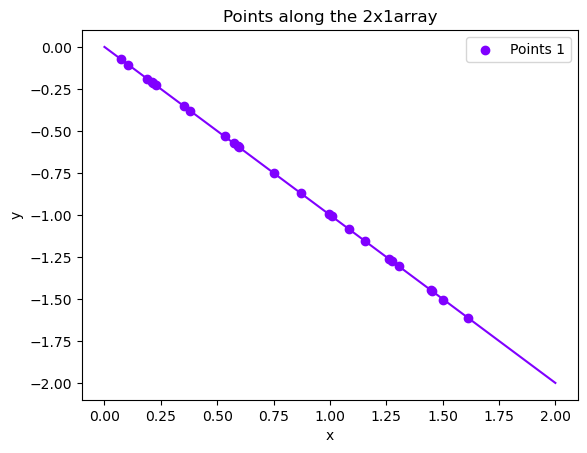

In [11]:
def plot_points_with_lines(points_list):

    def decode_points(point):
        dir  = point['my2x1array']
        values = [mag*dir for mag in point['myList']]
        
        return values

    colors = plt.cm.rainbow(np.linspace(0, 1, len(points_list)))
    for i, point_dict in enumerate(points_list):
        # Generate points
        points = decode_points(point_dict)
        # Plot scatter points
        plt.scatter(*zip(*points), color=colors[i], label=f'Points {i+1}')
        # Plot direction line
        plt.plot([0, point_dict['my2x1array'][0]], 
                [0, point_dict['my2x1array'][1]], 
                '-', color=colors[i])
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Points along the 2x1array')

plot_points_with_lines([randPoints])

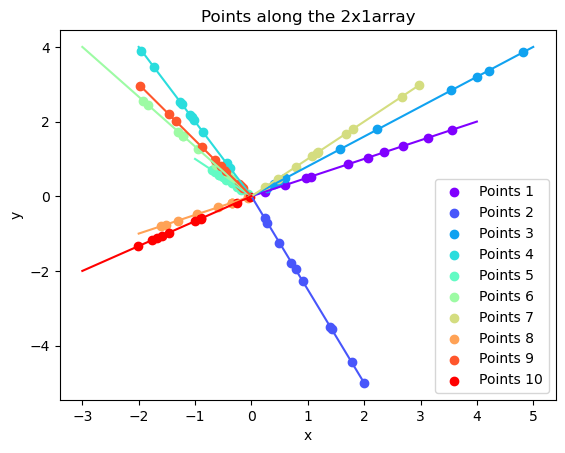

In [12]:

moreRandPoints = [mySpace['generator']() for _ in range(10)]
# Example usage with single point

mySpace['visualizer'] = plot_points_with_lines

mySpace['visualizer'](moreRandPoints)
# label the x and y axe

We can even make a distance function between two points. Then we can define and compute the **total** distance between all the associated  in 2d space. We're defining the the total distance as:

$D(x,y) = \sqrt{\sum_{i,j} (x_i - y_j)'(x_i-y_j) - \sum_{i,j} (x_i - x_j)'(x_i-x_j) - \sum_{i,j} (y_i - y_j)'(y_i-y_j)}$.

were $x$ and $y$ are constucted as $\{m\cdot v | \forall m\in M \}$ where $M =$`myList` and $v =$`my2x1array`.

In [13]:
def distance(point1, point2):
    dir_1  = point1['my2x1array']
    dir_2 = point2['my2x1array']

    values_1 = [mag*dir_1 for mag in point1['myList']]
    values_2 = [mag*dir_2 for mag in point2['myList']]

    # First term: sum_{i,j} (x_i - y_j)'(x_i-y_j)
    cross_term = 0
    for val1 in values_1:
        for val2 in values_2:
            cross_term += np.dot(val1 - val2, val1 - val2)
    
    #print(cross_term)
    
    # Second term: sum_{i,j} (x_i - x_j)'(x_i-x_j)
    x_term = 0
    for i, val1 in enumerate(values_1):
        for val2 in values_1[i:]:
            x_term += np.dot(val1 - val2, val1 - val2)
    
    #print(x_term)

    # Third term: sum_{i,j} (y_i - y_j)'(y_i-y_j)
    y_term = 0
    for i, val1 in enumerate(values_2):
        for val2 in values_2[i:]:
            y_term += np.dot(val1 - val2, val1 - val2)

    #print(y_term)
    
    total_dist = abs(cross_term - x_term - y_term)
    return total_dist**0.5

mySpace['metric'] = distance

Let's chech that the distance from a point to itself is 0.

In [14]:
mySpace['metric'](moreRandPoints[0], moreRandPoints[0])

3.371747880871523e-07

If we want our Space to be a metric space, we're going to equip it with addition and scalar multiplication. If the scalar passed is an integer we need only multipy the 2x1 array by the scalar and we're done. However, for scalar multiplication, if scalar is positive we can take the smallest integer greater than the scalar passed in and adjust the 2x1 array by that integer factor. then we need a scale factor to account for the overshoot, we can apply a correction to all the values in the list to rescale them down. If the scalar is negative we need to take the largest integer which is less than the scalar passed and then compute and apply the correction to the values in the list to scale them down. Note that in both cases we're overscaling to ensure we keep the 2x1 array integer valued and handling corrections in the list because it contains floats.  

In [15]:
#create the scalar multiplication function
def scalar_mult(scalar, point):
    if isinstance(scalar, int):
        # For integers, just multiply directly
        return {'myList': [val for val in point['myList']],
                'my2x1array': scalar*point['my2x1array']}
    else:
        # For non-integers, handle positive and negative cases separately
        if scalar > 0:
            # Get smallest integer greater than scalar
            int_scale = int(np.ceil(scalar))
            # Calculate correction factor to preserve non-negativity
            correction = (int_scale-scalar)/scalar
            # Apply correction to ensure non-negativity
            corrected_list = [max(0, correction*val) for val in point['myList']]
            return {'myList': corrected_list,
                    'my2x1array': int_scale*point['my2x1array']}
        else:
            # Get largest integer less than scalar 
            int_scale = int(np.floor(scalar))
            # Calculate correction factor to preserve non-negativity
            correction = (int_scale-scalar)/scalar
            # Apply correction to ensure non-negativity
            corrected_list = [max(0, correction*val) for val in point['myList']]
            return {'myList': corrected_list,
                    'my2x1array': int_scale*point['my2x1array']}
        
# Example usage
scaled_point = scalar_mult(-2, moreRandPoints[0])
print(moreRandPoints[0]['my2x1array'])
print(scaled_point['my2x1array'])

[4 2]
[-8 -4]


In [16]:
fl_scaled_point = scalar_mult(.5, moreRandPoints[0])
print(moreRandPoints[0]['my2x1array'])
print(moreRandPoints[0]['myList'])
print(scaled_point['my2x1array'])
print(scaled_point['myList'])
print(fl_scaled_point['my2x1array'])
print(fl_scaled_point['myList'])

[4 2]
[0.8915116471994396, 0.671657935358309, 0.586427252653659, 0.5168339883493676, 0.24410560128223013, 0.4292262851320955, 0.26352743035846005, 0.15093590241394217, 0.0599301687247189, 0.7847629639831062]
[-8 -4]
[0.8915116471994396, 0.671657935358309, 0.586427252653659, 0.5168339883493676, 0.24410560128223013, 0.4292262851320955, 0.26352743035846005, 0.15093590241394217, 0.0599301687247189, 0.7847629639831062]
[4 2]
[0.8915116471994396, 0.671657935358309, 0.586427252653659, 0.5168339883493676, 0.24410560128223013, 0.4292262851320955, 0.26352743035846005, 0.15093590241394217, 0.0599301687247189, 0.7847629639831062]


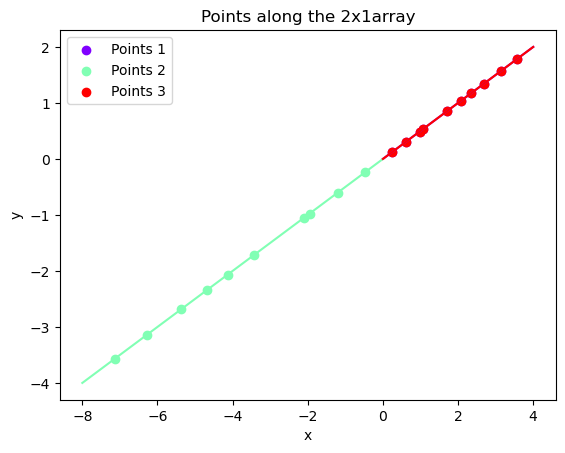

In [17]:
mySpace['visualizer'](moreRandPoints[:1] + [scaled_point] + [fl_scaled_point])

In [18]:
print("Distance between original and scaled point:")
print(mySpace['metric'](moreRandPoints[0], scaled_point))
print("scaled point and fractional scaled point:")
print(mySpace['metric'](scaled_point, fl_scaled_point))
print("original point and fractional scaled point:")
print(mySpace['metric'](moreRandPoints[0], fl_scaled_point))

Distance between original and scaled point:
61.70097539607237
scaled point and fractional scaled point:
61.70097539607237
original point and fractional scaled point:
3.371747880871523e-07


We've successfully introduced scalar multiplication! Now let's introduce addition.

In [19]:
#defining the addition function for mySpace
def add_points(point1, point2):
    return {'myList': point1['myList'] + point2['myList'],
            'my2x1array': point1['my2x1array'] + point2['my2x1array']}

In [20]:
sum_point = add_points(moreRandPoints[0], moreRandPoints[1])
print("Original points directions:")
print(moreRandPoints[0]['my2x1array'])
print(moreRandPoints[1]['my2x1array'])

print("Sum point directions:")
print(sum_point['my2x1array'])

Original points directions:
[4 2]
[ 2 -5]
Sum point directions:
[ 6 -3]


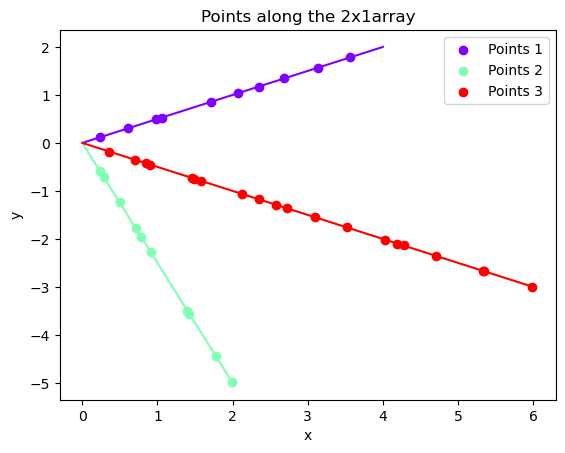

In [21]:
mySpace['visualizer']([moreRandPoints[0], moreRandPoints[1], sum_point])

In [22]:
undo_point = add_points(sum_point, scalar_mult(-1, moreRandPoints[1]))
print("Undo point directions:")
print(undo_point['my2x1array'])
print("Original point directions:")
print(moreRandPoints[0]['my2x1array'])
print("Undo point values")
print(undo_point['myList'])
print("Original point values")
print(moreRandPoints[0]['myList'])

Undo point directions:
[4 2]
Original point directions:
[4 2]
Undo point values
[0.8915116471994396, 0.671657935358309, 0.586427252653659, 0.5168339883493676, 0.24410560128223013, 0.4292262851320955, 0.26352743035846005, 0.15093590241394217, 0.0599301687247189, 0.7847629639831062, 0.698607272344407, 0.8893311728365134, 0.454753394096457, 0.2481279756553717, 0.11644855944576371, 0.9982150822227527, 0.7123423831784645, 0.39216147918377964, 0.3549716471582205, 0.14122354642834478, 0.698607272344407, 0.8893311728365134, 0.454753394096457, 0.2481279756553717, 0.11644855944576371, 0.9982150822227527, 0.7123423831784645, 0.39216147918377964, 0.3549716471582205, 0.14122354642834478]
Original point values
[0.8915116471994396, 0.671657935358309, 0.586427252653659, 0.5168339883493676, 0.24410560128223013, 0.4292262851320955, 0.26352743035846005, 0.15093590241394217, 0.0599301687247189, 0.7847629639831062]


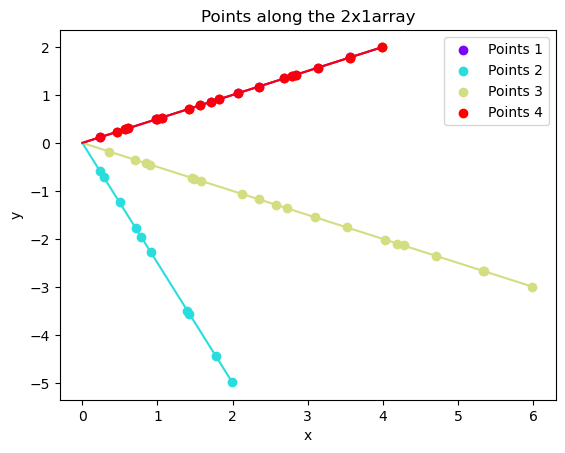

In [23]:
mySpace['visualizer']([moreRandPoints[0], moreRandPoints[1], sum_point, undo_point])

While at first glance it looks like the `undo_point` is the same as the original point, its worth noting that our addition definition includes concatenating the lists so we've picked up a bunch of extra points. If we check the distance between the points we will see it is not zero, the we can plot the values to show the differnence

In [24]:
print("Distance between original and undo point:")
print(mySpace['metric'](moreRandPoints[0], undo_point))

Distance between original and undo point:
26.203949887818013


4.2


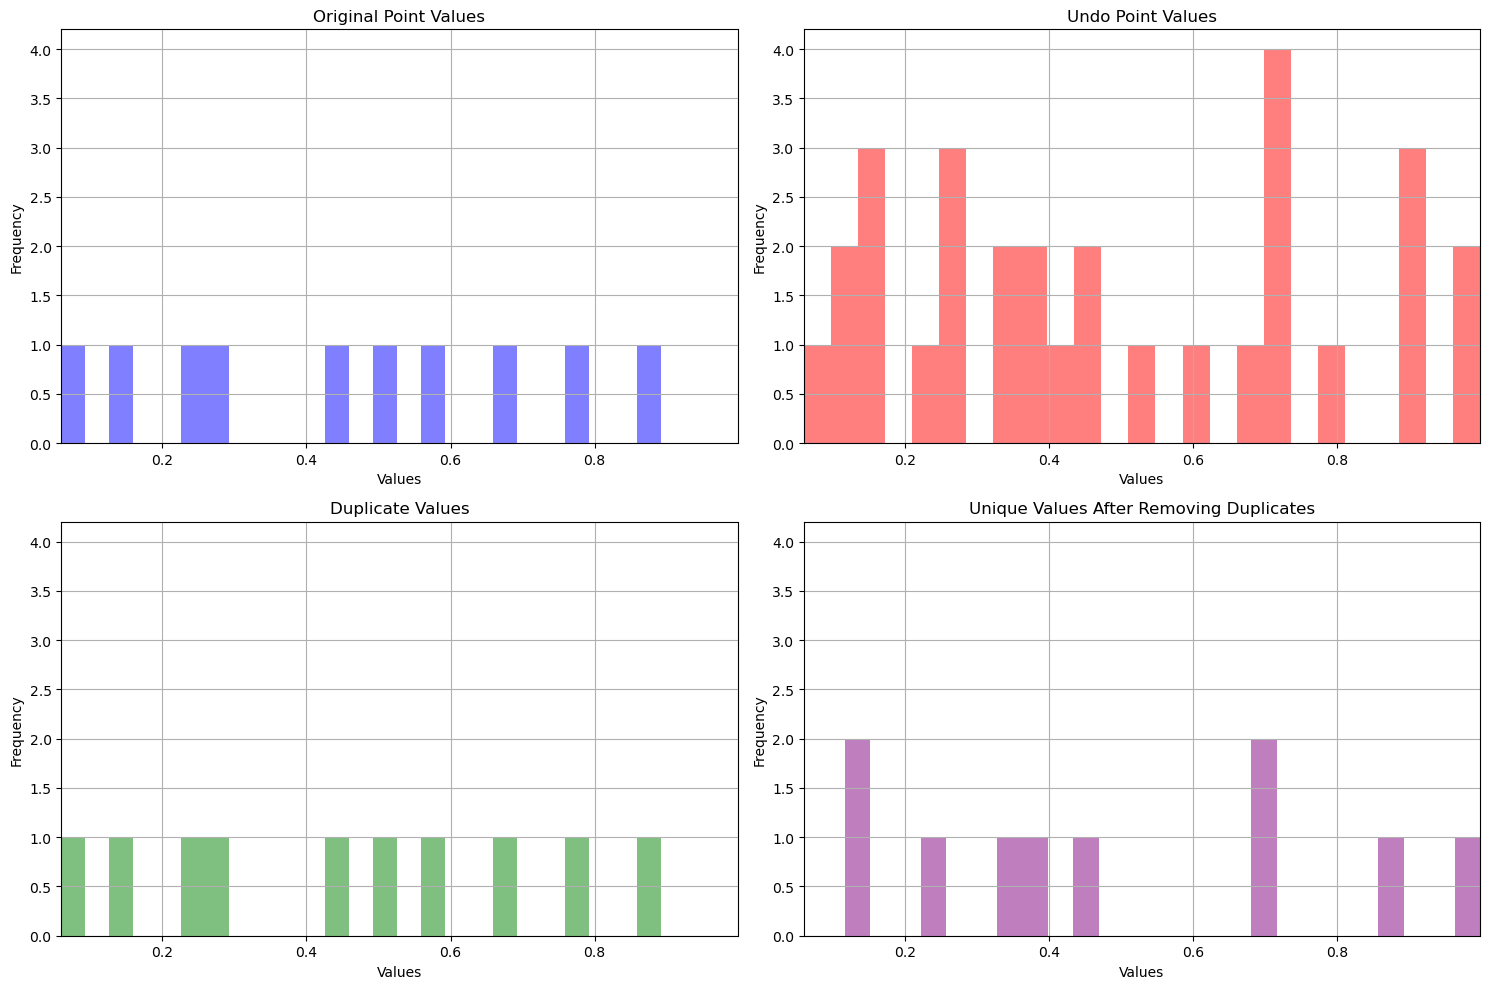

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the original and undo point values
axs[0, 0].hist(moreRandPoints[0]['myList'], bins=25, alpha=0.5, label='Original Point', color='blue')
axs[0, 0].set_title('Original Point Values')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

axs[0, 1].hist(undo_point['myList'], bins=25, alpha=0.5, label='Undo Point', color='red')
axs[0, 1].set_title('Undo Point Values')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Finding duplicate values
duplicate_values = set(moreRandPoints[0]['myList']).intersection(undo_point['myList'])
axs[1, 0].hist(list(duplicate_values), bins=25, alpha=0.5, label='Duplicate Values', color='green')
axs[1, 0].set_title('Duplicate Values')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Finding values left after removing duplicates
unique_values_original = set(moreRandPoints[0]['myList']).difference(undo_point['myList'])
unique_values_undo = set(undo_point['myList']).difference(moreRandPoints[0]['myList'])
axs[1, 1].hist(list(unique_values_original.union(unique_values_undo)), bins=25, alpha=0.5, label='Unique Values', color='purple')
axs[1, 1].set_title('Unique Values After Removing Duplicates')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

# compute the highest observed frequency across all bins
max_freq = max([ax[1].get_ylim()[1] for ax in axs])
print(max_freq)

# Setting the same limits on the y axis and the same bins on the x axis for all plots
for ax in axs.flat:
    ax.set_ylim(0, max_freq)  # Setting the same y-axis limits for all plots
    ax.set_xlim(min(min(moreRandPoints[0]['myList']), min(undo_point['myList']), min(duplicate_values), min(unique_values_original.union(unique_values_undo))), 
                max(max(moreRandPoints[0]['myList']), max(undo_point['myList']), max(duplicate_values), max(unique_values_original.union(unique_values_undo))))  # Setting the same x-axis limits for all plots

plt.tight_layout()
plt.show()

It is clear that we picked up some addition points but actually they didn't come from nowhere. These are artifacts of the fact that our addition method contained a concatenation. 

2.1


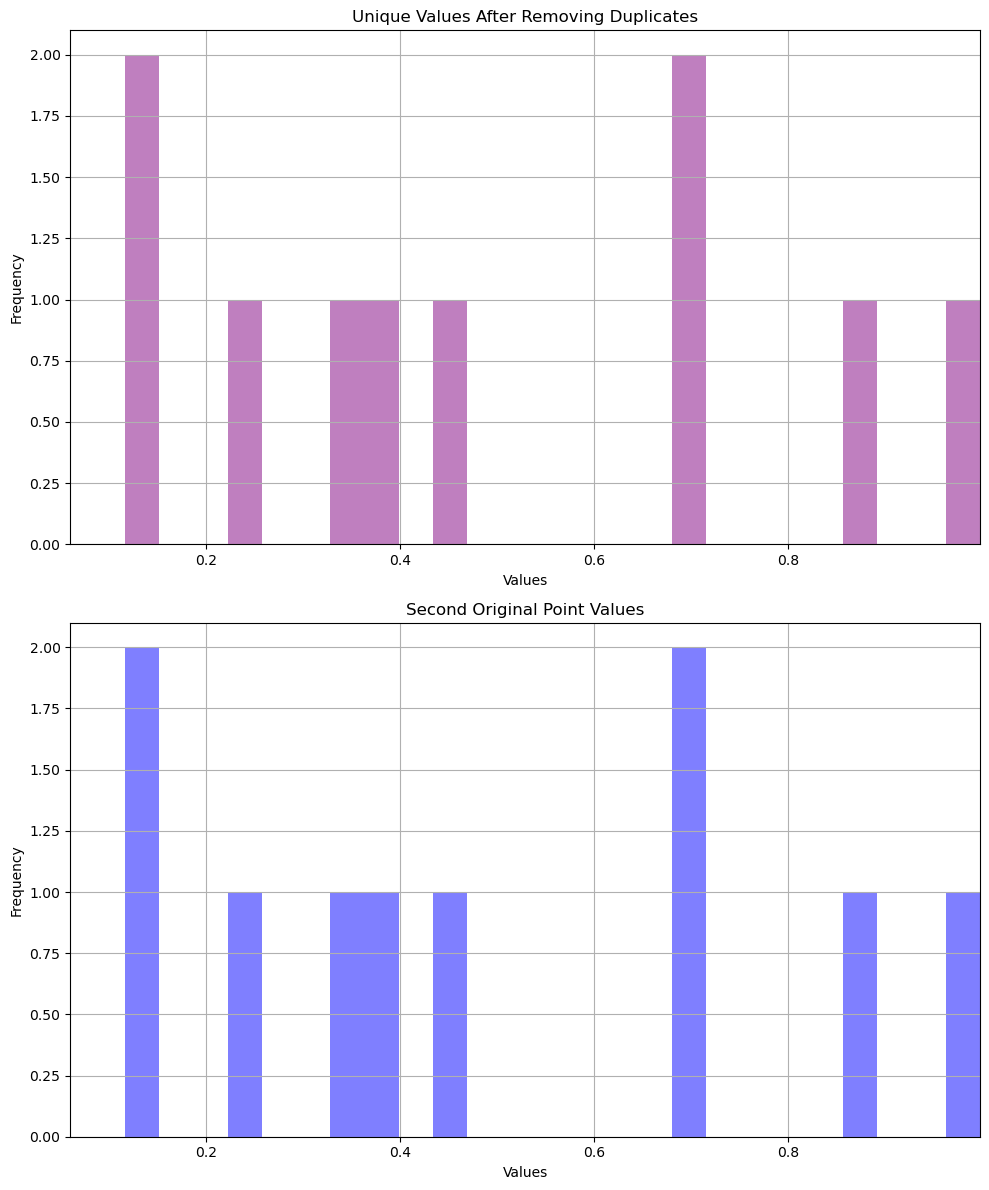

In [26]:
# Plotting the unique values after removing duplicates
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].hist(list(unique_values_original.union(unique_values_undo)), bins=25, alpha=0.5, label='Unique Values', color='purple')
axs[0].set_title('Unique Values After Removing Duplicates')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plotting the second original point
axs[1].hist(moreRandPoints[1]['myList'], bins=25, alpha=0.5, label='Second Original Point', color='blue')
axs[1].set_title('Second Original Point Values')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

# compute the highest observed frequency across all bins
max_freq = max([ax.get_ylim()[1] for ax in axs])
print(max_freq)

# Setting the same limits on the y axis and the same bins on the x axis for all plots
for ax in axs.flat:
    ax.set_ylim(0, max_freq)  # Setting the same y-axis limits for all plots
    ax.set_xlim(min(min(moreRandPoints[1]['myList']), min(undo_point['myList']), min(unique_values_original.union(unique_values_undo))), 
                max(max(moreRandPoints[1]['myList']), max(undo_point['myList']), max(unique_values_original.union(unique_values_undo))))  # Setting the same x-axis limits for all plots

plt.tight_layout()
plt.show()


Let's put our scalar multiplication and addition methods into our space.

In [27]:
mySpace['scalar_mult'] = scalar_mult
mySpace['add_points'] = add_points

MySpace is a bit strange but that is the point -- our goal isn't necessarily to make beautiful math, it is to construct spaces incrementally, to discover their properties through computation, and when they are useful modeling components to save them to be used later. While this particular implementation based on just dictionaries is a bit messy, it is nonetheless instructive in how spaces which are not vectorspaces can be assembed and used.

In [28]:
mySpace

{'schema': {'myList': typing.List[float],
  'my2x1array': numpy.ndarray[tuple[int, int], float]},
 'constraint': <function __main__.myFunc(myList: List[float], myArray: numpy.ndarray) -> bool>,
 'generator': <function __main__.make_random_point(list_length=10)>,
 'visualizer': <function __main__.plot_points_with_lines(points_list)>,
 'metric': <function __main__.distance(point1, point2)>,
 'scalar_mult': <function __main__.scalar_mult(scalar, point)>,
 'add_points': <function __main__.add_points(point1, point2)>}

Using only dictionaries we've built up a custom statespace with non-trivial data structures, with domain constraints, a random point generate, a visualization method, a metric, as well as a definition for scalar multiplication and addition!